In [1]:
import pickle as pkl
import numpy as np

from src.models.train_emos import train_emos, train_and_test_emos
from src.visualization.brier_score import brier_skill_plot, brier_plot
from src.visualization.reliability_diagram import make_reliability_diagram
from src.models.get_data import get_tensors, get_normalized_tensor
from src.models.emos import EMOS
from src.models.emos import EMOS



2024-03-07 14:00:20.762782: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 14:00:20.789943: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 14:00:20.789968: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 14:00:20.790714: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 14:00:20.800573: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 14:00:20.801043: I tensorflow/core/platform/cpu_feature_guard.cc:1

(7780, 5)
Using given parameters for Truncated Normal distribution


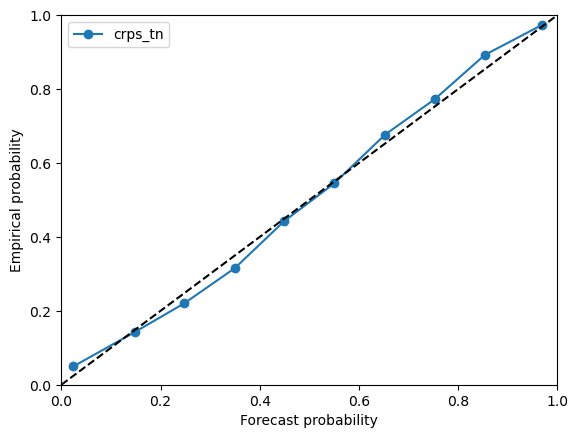

In [2]:
neighbourhood_size = 11
parameter_names = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']
ignore = ['229', '285', '323']
train_folds = [1, 2]
train_data = get_normalized_tensor(neighbourhood_size, parameter_names, train_folds, ignore)

X_train = train_data['X']
y_train = train_data['y']
variances_train = train_data['variances']
mean_train = train_data['mean']
std_train = train_data['std']

test_fold = 3

X_test, y_test, variances_test = get_tensors(neighbourhood_size, parameter_names, test_fold, ignore)
X_test = (X_test - mean_train) / std_train

print(X_test.shape)

# load the dictionary with the data from /net/pc200239/nobackup/users/hakvoort/models
with open('/net/pc200239/nobackup/users/hakvoort/models/emos_crps.pkl', 'rb') as f:
    models_crps = pkl.load(f)

emos_crps = {}

#emos_crps["crps_log_normal"] = EMOS(models_crps["crps_log_normal"])
emos_crps["crps_tn"] = EMOS(models_crps["crps_tn"])

value = 5
make_reliability_diagram(emos_crps, X_test, y_test, variances_test, value, n_subset = 11)